In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.linear_model import LogisticRegression
!conda install xlrd -y
!pip install wordcloud

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.9.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.9.0



# All requested packages already installed.



In [20]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/Users/abimbolaosowemimo/Desktop/Amazon_Unlocked_Mobile.csv")

# Display the first few rows of the dataset
data.head()



,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download stopwords and wordnet for nltk
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()


# Simplified text cleaning function without stopwords and lemmatization
def simple_clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuations, numbers, and special characters
    text = re.sub('[^a-z\s]', '', text)
    return text

# Apply the simplified cleaning function to the Reviews column
data['Cleaned_Reviews'] = data['Reviews'].astype(str).apply(simple_clean_text)

# Display the first few cleaned reviews
data[['Reviews', 'Cleaned_Reviews']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abimbolaosowemimo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/abimbolaosowemimo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Reviews,Cleaned_Reviews
0,I feel so LUCKY to have found this used (phone...,i feel so lucky to have found this used phone ...
1,"nice phone, nice up grade from my pantach revu...",nice phone nice up grade from my pantach revue...
2,Very pleased,very pleased
3,It works good but it goes slow sometimes but i...,it works good but it goes slow sometimes but i...
4,Great phone to replace my lost phone. The only...,great phone to replace my lost phone the only ...


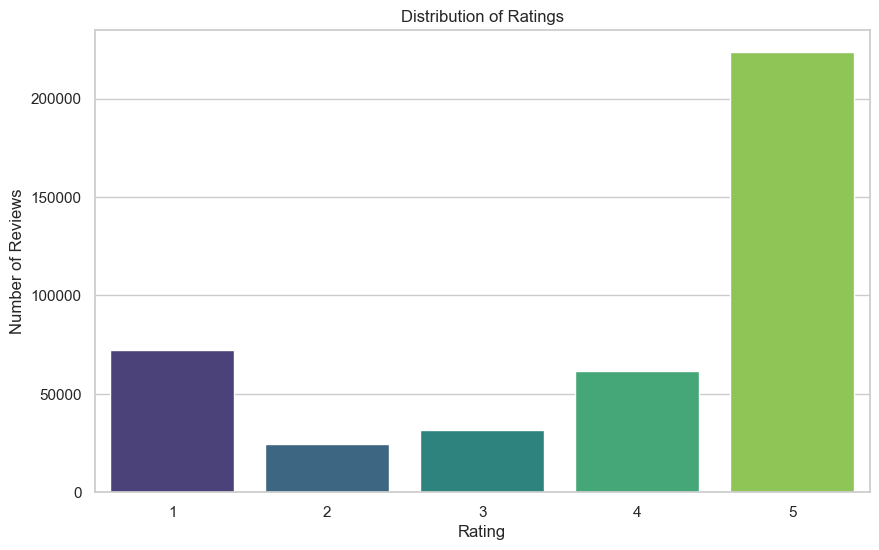

In [4]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a bar plot of 'Rating' value counts
plt.figure(figsize=(10,6))
sns.countplot(x='Rating', data=data, palette="viridis")
plt.title('Distribution of Ratings')
plt.ylabel('Number of Reviews')
plt.xlabel('Rating')
plt.show()


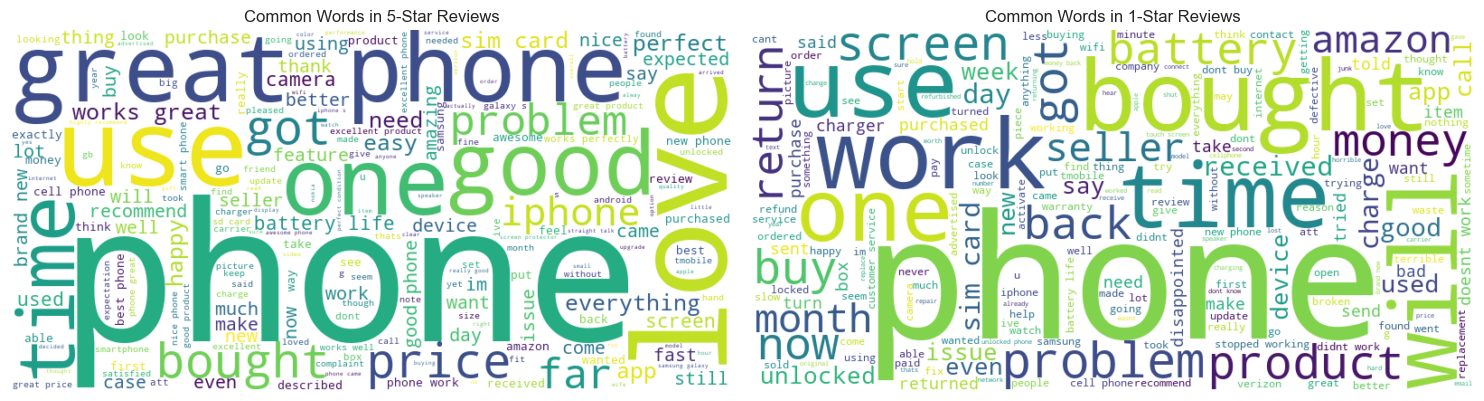

In [5]:
from wordcloud import WordCloud

# Separate the 5-star and 1-star reviews
reviews_5_star = ' '.join(data[data['Rating'] == 5]['Cleaned_Reviews'])
reviews_1_star = ' '.join(data[data['Rating'] == 1]['Cleaned_Reviews'])

# Generate word clouds
wordcloud_5_star = WordCloud(background_color="white", width=800, height=400).generate(reviews_5_star)
wordcloud_1_star = WordCloud(background_color="white", width=800, height=400).generate(reviews_1_star)

# Plotting the word clouds
plt.figure(figsize=(15, 7))

# 5-Star Reviews
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_5_star, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in 5-Star Reviews')

# 1-Star Reviews
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_1_star, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in 1-Star Reviews')

plt.tight_layout()
plt.show()


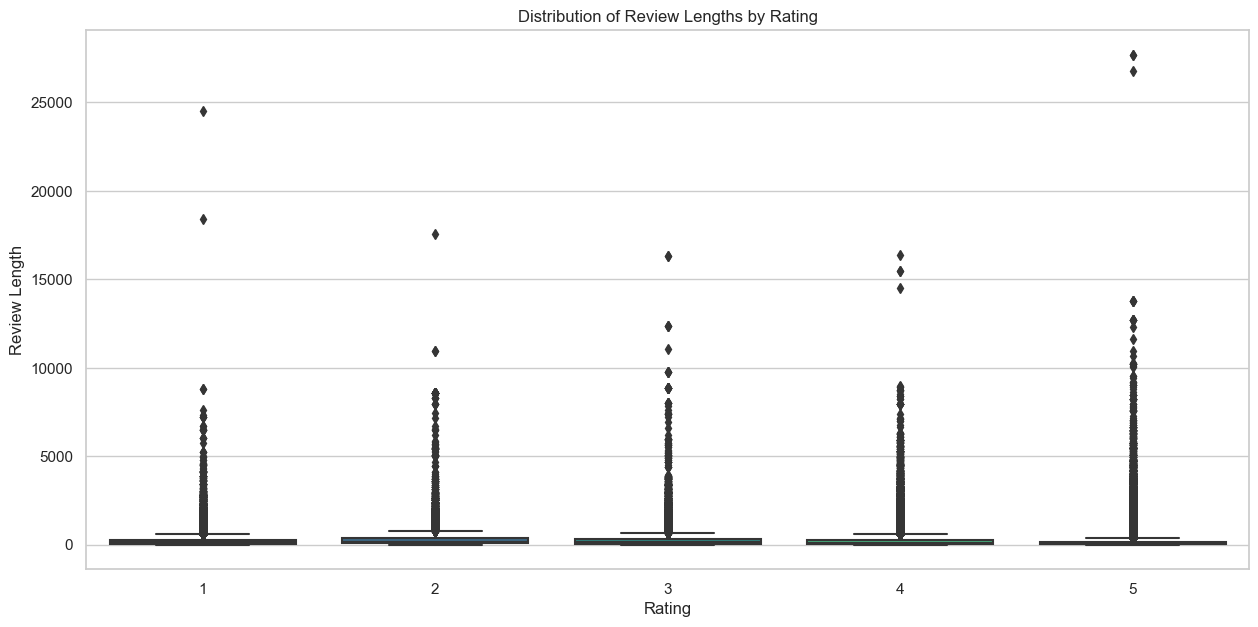

In [6]:
# Calculate the length of each review
data['Review_Length'] = data['Cleaned_Reviews'].apply(len)

# Visualize the distribution of review lengths for each rating
plt.figure(figsize=(15, 7))
sns.boxplot(x='Rating', y='Review_Length', data=data, palette="viridis")
plt.title('Distribution of Review Lengths by Rating')
plt.ylabel('Review Length')
plt.xlabel('Rating')
plt.show()


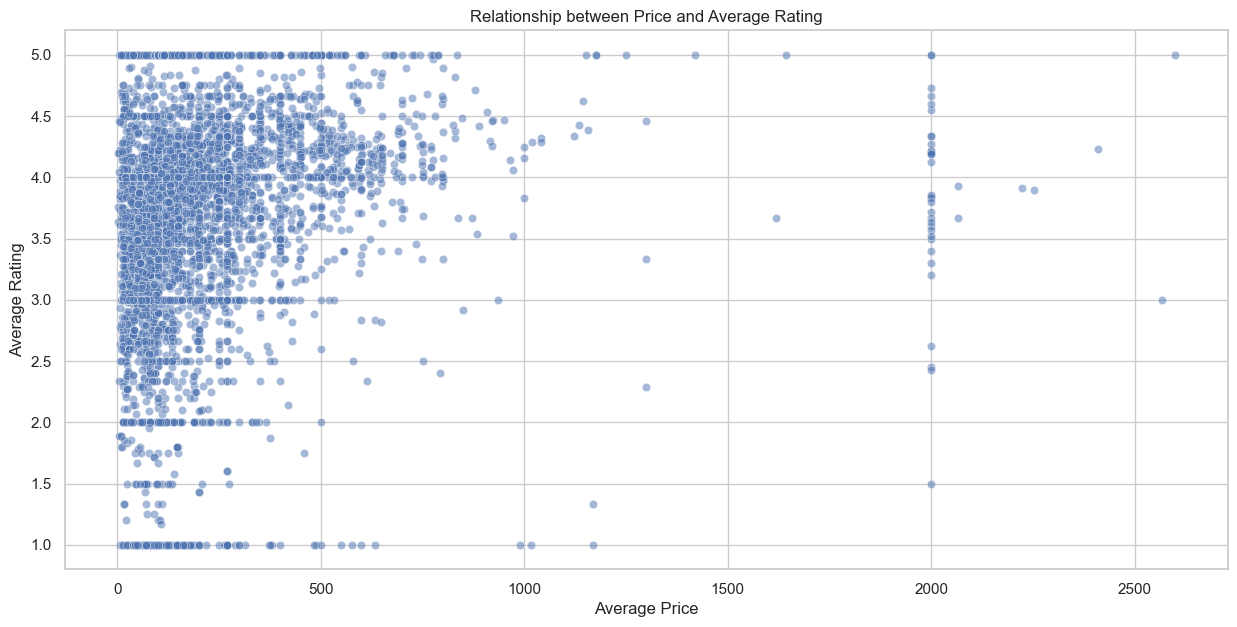

In [7]:
# Group by 'Product Name' and calculate the average rating and average price for each product
product_ratings = data.groupby('Product Name').agg({'Rating':'mean', 'Price':'mean'}).reset_index()

# Plot the relationship between price and average rating
plt.figure(figsize=(15, 7))
sns.scatterplot(x='Price', y='Rating', data=product_ratings, alpha=0.5)
plt.title('Relationship between Price and Average Rating')
plt.ylabel('Average Rating')
plt.xlabel('Average Price')
plt.show()


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Transform the cleaned reviews into TF-IDF vectors
X = tfidf_vectorizer.fit_transform(data['Cleaned_Reviews'].astype(str))
y = data['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape


((289688, 5000), (124152, 5000))

In [9]:
# Initialize a Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
lr_model.fit(X_train, y_train)

# Predict ratings on the test set
y_pred = lr_model.predict(X_test)

# Calculate the classification report
report = classification_report(y_test, y_pred)

report


'              precision    recall  f1-score   support\n\n           1       0.68      0.84      0.75     21819\n           2       0.49      0.18      0.27      7449\n           3       0.48      0.25      0.33      9502\n           4       0.50      0.23      0.31     18529\n           5       0.78      0.94      0.85     66853\n\n    accuracy                           0.72    124152\n   macro avg       0.58      0.49      0.50    124152\nweighted avg       0.68      0.72      0.68    124152\n'

In [10]:
# Convert ratings into binary classes
data['Sentiment'] = data['Rating'].apply(lambda x: 'Positive' if x > 3 else 'Negative')

# Transform the cleaned reviews into TF-IDF vectors
X_sentiment = tfidf_vectorizer.transform(data['Cleaned_Reviews'].astype(str))
y_sentiment = data['Sentiment']

# Split the data into training and testing sets for sentiment analysis
X_train_sentiment, X_test_sentiment, y_train_sentiment, y_test_sentiment = train_test_split(X_sentiment, y_sentiment, test_size=0.3, random_state=42)

# Initialize and train a Logistic Regression model for sentiment analysis
lr_model_sentiment = LogisticRegression(max_iter=1000, random_state=42)
lr_model_sentiment.fit(X_train_sentiment, y_train_sentiment)

# Predict sentiments on the test set
y_pred_sentiment = lr_model_sentiment.predict(X_test_sentiment)

# Calculate the classification report for sentiment analysis
report_sentiment = classification_report(y_test_sentiment, y_pred_sentiment)

report_sentiment


'              precision    recall  f1-score   support\n\n    Negative       0.87      0.82      0.84     38770\n    Positive       0.92      0.94      0.93     85382\n\n    accuracy                           0.90    124152\n   macro avg       0.89      0.88      0.89    124152\nweighted avg       0.90      0.90      0.90    124152\n'

In [11]:
# Extract brand names by splitting the 'Product Name' column
data['Brand'] = data['Product Name'].str.split().str[0]

# Check the top brands in the dataset by frequency
top_brands = data['Brand'].value_counts().head(10)
top_brands


Samsung       82800
Apple         76970
BLU           58659
LG            29240
Nokia         18350
HTC           13075
CNPGD         12877
Motorola      12500
Blackberry    11679
Sony          11081
Name: Brand, dtype: int64